# PISA 2022 analysis

Some basic analysis on school student performance in PISA tests across OECD countries. in particular we examine
- the effect of GDP per capita
- Culture
- Gender
- etc.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading data
data source: https://www.oecd-ilibrary.org/education/pisa-2022-results-volume-i_53f23881-en

In [2]:
df_score__raw = pd.read_csv("data/pisa_2022.csv")
df_score__raw

,category,country,gender,score
0,math,Australia,girl,481
1,math,Australia,boy,493
2,reading,Australia,girl,509
3,reading,Australia,boy,487
4,science,Australia,girl,506
...,...,...,...,...
217,math,United States,boy,471
218,reading,United States,girl,515
219,reading,United States,boy,493
220,science,United States,girl,496


math has 95%-conf performance delta: -19.58 to 1.64


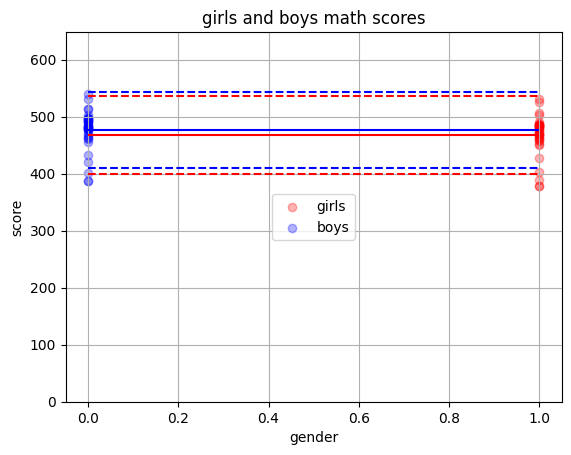

reading has 95%-conf performance delta: 6.54 to 42.02


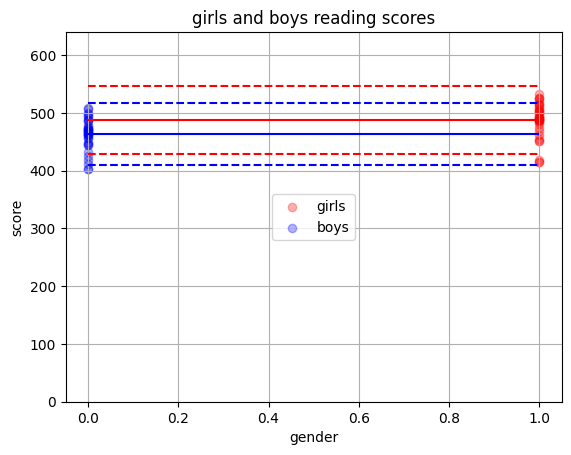

science has 95%-conf performance delta: -15.44 to 15.84


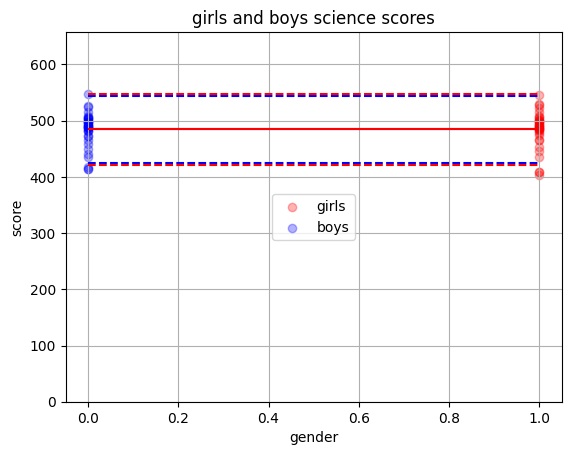

In [10]:
df_score = df_score__raw.copy()

df_score["is_girl"] = (df_score["gender"] == "girl").astype(int)
df_score = df_score.drop(columns=["gender"])
for subject in ["math", "reading", "science"]:
    
    df_score__math = df_score[df_score["category"] == subject].copy()
    df_score__math_girl =  df_score__math[df_score__math["is_girl"] == 1].copy()
    df_score__math_boy =  df_score__math[df_score__math["is_girl"] == 0].copy()
    df_score__math_girl["score__girl"] = df_score__math_girl["score"]
    df_score__math_boy["score__boy"] = df_score__math_boy["score"]

    df_score__math_diff = df_score__math_girl.copy().merge(
        df_score__math_boy.copy(), on=["country", "category"], how="inner")
    df_score__math_diff["score_diff"] = df_score__math_diff["score__girl"] - \
        df_score__math_diff["score__boy"]

    mean = df_score__math_diff["score_diff"].mean()
    std = df_score__math_diff["score_diff"].std()
    lb = mean - 1.97 * std
    ub = mean + 1.96 * std
    print(f"{subject} has 95%-conf performance delta: {lb:.2f} to {ub:.2f}")


    
    plt.figure()
    plt.title(f"girls and boys {subject} scores")
    plt.scatter(x=df_score__math_girl["is_girl"], y=df_score__math_girl["score"],
                color="red", label="girls", alpha=0.3)
    plt.scatter(x=df_score__math_boy["is_girl"], y=df_score__math_boy["score"],
                color="blue", label="boys", alpha=0.3)
    plt.legend(loc="center")
    plt.hlines(df_score__math_boy["score"].mean(), 0, 1, color="blue",ls="-")
    plt.hlines(df_score__math_girl["score"].mean(), 0, 1, color="red",ls="-")

    plt.hlines(df_score__math_boy["score"].mean() +\
        df_score__math_boy["score"].std() * 1.97, 0, 1, color="blue", ls="--")
    plt.hlines(df_score__math_boy["score"].mean() -\
        df_score__math_boy["score"].std() * 1.97, 0, 1, color="blue", ls="--")

    plt.hlines(df_score__math_girl["score"].mean() +\
        df_score__math_girl["score"].std() * 1.97, 0, 1, color="red", ls="--")
    plt.hlines(df_score__math_girl["score"].mean() - \
        df_score__math_girl["score"].std() * 1.97, 0, 1, color="red", ls="--")

    plt.ylim(0, max(df_score__math_girl["score"].max(), df_score__math_boy["score"].max()) * 1.2)
    plt.xlabel("gender")
    plt.ylabel("score")
    plt.grid()
    plt.show()
    

## Delta analysis